In [1]:
import numpy as np
import os
import pandas as pd
os.chdir('/restricted/projectnb/ma679/Data')
df = pd.read_csv("NRD_2020_Core.CSV",nrows=100000,header=None)
df.head()

/scratch/7136057.1.academic-gpu/ipykernel_546283/687448704.py:5: DtypeWarning: Columns (55,71,72,73,74,75,76,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NRD_2020_Core.CSV",nrows=100000,header=None)


,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,61,0,0,1.325745,1,5,2,177,37,177,...,-99,-99,-99,-99,0,1,0,111628,2020,1
1,77,1,0,1.306541,5,9,3,690,37,690,...,-99,-99,-99,-99,0,1,0,39610,2020,1
2,56,1,0,1.325745,1,6,2,885,37,885,...,-99,-99,-99,-99,0,1,0,18063,2020,4
3,47,1,0,1.325745,7,3,1,623,37,623,...,-99,-99,-99,-99,0,1,0,66239,2020,3
4,57,0,0,1.297377,1,2,1,192,37,192,...,-99,-99,-99,-99,0,1,0,15049,2020,1


For the data preparation, for now, I am trying to calculate the days between admissions。I want to use this as a proxy for the time interval between hospitalizations, look for other variables in relation to that, and in the coming week, I'll calculate the hospitalization rate and do some in-depth analysis

By calculating the days between two admissions, I use the largest value of days to event to minus the smallest value of days to event and then minus the LOS.

Due to the limited time of week 3 checkin, I calcualted this varaible as a new column and looking for relationship of it and other potential variables using eda and model analyze.

In [2]:
#Data cleaning#
#df=df.dropna(axis=0)
#df.shape[1]

In [3]:
# Define the column names
column_names = [
    "AGE", "AWEEKEND", "DIED", "DISCWT", "DISPUNIFORM", "DMONTH", "DQTR", "DRG", "DRGVER",
    "DRG_NoPOA", "ELECTIVE", "FEMALE", "HCUP_ED", "HOSP_NRD", "I10_BIRTH", "I10_DELIVERY",
    "I10_DX1", "I10_DX2", "I10_DX3", "I10_DX4", "I10_DX5", "I10_DX6", "I10_DX7", "I10_DX8",
    "I10_DX9", "I10_DX10", "I10_DX11", "I10_DX12", "I10_DX13", "I10_DX14", "I10_DX15", "I10_DX16",
    "I10_DX17", "I10_DX18", "I10_DX19", "I10_DX20", "I10_DX21", "I10_DX22", "I10_DX23", "I10_DX24",
    "I10_DX25", "I10_DX26", "I10_DX27", "I10_DX28", "I10_DX29", "I10_DX30", "I10_DX31", "I10_DX32",
    "I10_DX33", "I10_DX34", "I10_DX35", "I10_DX36", "I10_DX37", "I10_DX38", "I10_DX39", "I10_DX40",
    "I10_INJURY", "I10_MULTINJURY", "I10_NDX", "I10_NPR", "I10_PR1", "I10_PR2", "I10_PR3", "I10_PR4",
    "I10_PR5", "I10_PR6", "I10_PR7", "I10_PR8", "I10_PR9", "I10_PR10", "I10_PR11", "I10_PR12",
    "I10_PR13", "I10_PR14", "I10_PR15", "I10_PR16", "I10_PR17", "I10_PR18", "I10_PR19", "I10_PR20",
    "I10_PR21", "I10_PR22", "I10_PR23", "I10_PR24", "I10_PR25", "I10_SERVICELINE", "KEY_NRD", "LOS",
    "MDC", "MDC_NoPOA", "NRD_DaysToEvent", "NRD_STRATUM", "NRD_VisitLink", "PAY1", "PCLASS_ORPROC",
    "PL_NCHS", "PRDAY1", "PRDAY2", "PRDAY3", "PRDAY4", "PRDAY5", "PRDAY6", "PRDAY7", "PRDAY8",
    "PRDAY9", "PRDAY10", "PRDAY11", "PRDAY12", "PRDAY13", "PRDAY14", "PRDAY15", "PRDAY16", "PRDAY17",
    "PRDAY18", "PRDAY19", "PRDAY20", "PRDAY21", "PRDAY22", "PRDAY23", "PRDAY24", "PRDAY25", 
    "REHABTRANSFER", "RESIDENT", "SAMEDAYEVENT", "TOTCHG", "YEAR", "ZIPINC_QRTL"
]
df.columns = column_names
df.head()


,AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,DRG_NoPOA,...,PRDAY22,PRDAY23,PRDAY24,PRDAY25,REHABTRANSFER,RESIDENT,SAMEDAYEVENT,TOTCHG,YEAR,ZIPINC_QRTL
0,61,0,0,1.325745,1,5,2,177,37,177,...,-99,-99,-99,-99,0,1,0,111628,2020,1
1,77,1,0,1.306541,5,9,3,690,37,690,...,-99,-99,-99,-99,0,1,0,39610,2020,1
2,56,1,0,1.325745,1,6,2,885,37,885,...,-99,-99,-99,-99,0,1,0,18063,2020,4
3,47,1,0,1.325745,7,3,1,623,37,623,...,-99,-99,-99,-99,0,1,0,66239,2020,3
4,57,0,0,1.297377,1,2,1,192,37,192,...,-99,-99,-99,-99,0,1,0,15049,2020,1


In [4]:
#select those NRD_VisitLink with two rows of data
new_df_filtered = df.groupby('NRD_VisitLink').filter(lambda x: x['NRD_VisitLink'].count() >= 2)
new_df_filtered.head(10)

,AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,DRG_NoPOA,...,PRDAY22,PRDAY23,PRDAY24,PRDAY25,REHABTRANSFER,RESIDENT,SAMEDAYEVENT,TOTCHG,YEAR,ZIPINC_QRTL
4,57,0,0,1.297377,1,2,1,192,37,192,...,-99,-99,-99,-99,0,1,0,15049,2020,1
6,28,0,0,1.362349,1,2,1,885,37,885,...,-99,-99,-99,-99,0,1,0,12326,2020,2
8,53,0,0,1.297377,5,4,2,638,37,638,...,-99,-99,-99,-99,0,1,0,83660,2020,3
15,43,0,0,1.362349,1,4,2,885,37,885,...,-99,-99,-99,-99,0,1,0,11426,2020,1
20,55,1,0,1.325745,1,9,3,885,37,885,...,-99,-99,-99,-99,0,1,0,25980,2020,1
21,27,1,0,1.362349,1,11,4,885,38,885,...,-99,-99,-99,-99,0,1,0,26982,2020,1
24,35,0,0,1.362349,5,3,1,375,37,375,...,-99,-99,-99,-99,0,1,0,6485,2020,2
25,26,0,0,1.362349,1,7,3,885,37,885,...,-99,-99,-99,-99,0,1,0,18520,2020,1
27,78,0,0,1.306541,5,12,4,177,38,177,...,-99,-99,-99,-99,0,1,0,70490,2020,4
30,80,0,0,1.306541,1,1,1,190,37,190,...,-99,-99,-99,-99,0,1,0,77887,2020,1


In [5]:
df_new1 = new_df_filtered.groupby('NRD_VisitLink')['NRD_DaysToEvent'].agg(['max', 'min'])
#df_new1['Event_Duration'] = df_new1['max'] - df_new1['min']
df_new1.head(10)

,max,min
NRD_VisitLink,,
h00282o,20415,20373
h002c4p,15110,15011
h002uax,21788,21622
h00ho1p,19506,19474
h00j4bw,17561,17507
h00jbug,14078,13918
h00k4i8,24655,24446
h00qrq8,19483,19394
h00to8x,19390,19321


In [6]:
difference = new_df_filtered.groupby('NRD_VisitLink')['NRD_DaysToEvent'].apply(lambda x: x.max() - x.min()).reset_index()
difference.columns = ['NRD_VisitLink', 'days_between']
merged_df = pd.merge(new_df_filtered, difference, on='NRD_VisitLink')
min_days_to_event = merged_df.groupby('NRD_VisitLink')['NRD_DaysToEvent'].transform('min')
merged_df['days_between'] -= merged_df['LOS'] * (merged_df['NRD_DaysToEvent'] == min_days_to_event)
merged_df = merged_df.drop_duplicates(subset='NRD_VisitLink', keep='first')

In [7]:
merged_df[['NRD_VisitLink', 'NRD_DaysToEvent', 'days_between', 'LOS']].head(10)


,NRD_VisitLink,NRD_DaysToEvent,days_between,LOS
0,h1jtjy8,17374,276,3
2,h7j8398,21787,253,5
7,hc5anip,20381,109,9
11,hgsg4w1,15104,54,5
14,htvoxgg,13826,231,11
20,heddtoc,20050,238,13
31,hw02dwi,16588,263,0
34,ht4i5ds,22248,127,7
38,hdrkjbz,15499,298,5
43,hzaf6vo,15198,240,8


To predict the days_between, I need to first define which predictor should be used, so I do the following analysis aiming to find the predictors

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [9]:
#merged_df[["I10_DX9", "I10_DX10", "I10_DX11", "I10_DX12"]].head(10)

First, I need to do some data cleaning

In [10]:
#select those non-string columns#
non_string_columns = merged_df.select_dtypes(exclude=['object']).columns.tolist()
merged_df_non_string = merged_df[non_string_columns]

In [11]:
merged_df_non_string.shape

(11572, 62)

In [12]:
#assigning 0 and 1 to those who doesn't readmit in 30 days and who readmit in 30 days#
merged_df_non_string['days_between_new'] = merged_df_non_string['days_between'].apply(lambda x: "1" if x <= 30 else "0")

/scratch/7136057.1.academic-gpu/ipykernel_546283/3271435052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_non_string['days_between_new'] = merged_df_non_string['days_between'].apply(lambda x: "1" if x <= 30 else "0")


In [13]:
merged_df_non_string['days_between_new'].dtype

dtype('O')

In [14]:
unique_values = merged_df_non_string.apply(lambda col: col.unique())

# Print unique values in each column
for column_name, values in unique_values.items():
    print("Column:", column_name)
    print("Unique values:", values)

Column: AGE
Unique values: [57 28 53 43 55 27 35 26 78 80 63 90 64 41 79 62 36 49 77 66 56 65 60 74
 59 61 58 72 51 29 24 84 69 22 82 31 32 34 73 71 48 67 52 33 86 21 40 88
 76 50 85 75 46 25 30 45 39 38 54 20 70 37 89 44 81 83 23 42 47 87 68 19
 18  1  0  3 11  2 17 15 12  4 13  9 14  6 16  8  7  5 10]
Column: AWEEKEND
Unique values: [0 1]
Column: DIED
Unique values: [ 0  1 -8 -9]
Column: DISCWT
Unique values: [1.2973771 1.362349  1.3257446 1.3065405 1.2717214 1.2610605 1.1470292
 1.1452607 1.1259451 1.111771  1.1538031 1.1943759 1.39836   1.4359327
 1.4215268 1.6134112 1.3911725 1.4108876 1.4138962 2.709199  2.7141459
 1.5977085 1.5029913 1.4176855 1.4625    1.4836321 1.3804057 1.4419643
 1.329694  1.2766689 1.3281219 1.3017334 1.2892664 1.4005213 2.8835846
 2.8184629 2.8928673 2.893631  2.7515853 2.6344458 1.732991  1.7745434
 1.5136842 1.1207082 1.1700529 1.1654926 1.0884107 1.0632868 1.099142
 1.3213684 1.3606994 1.4052488 1.3610176 1.4619967 1.4870868 4.0493699
 3.9807165 3.85621

In [15]:
predictors_cols = merged_df_non_string.drop(columns=['days_between']).columns.tolist()
predictors_cols

['AGE',
 'AWEEKEND',
 'DIED',
 'DISCWT',
 'DISPUNIFORM',
 'DMONTH',
 'DQTR',
 'DRG',
 'DRGVER',
 'DRG_NoPOA',
 'ELECTIVE',
 'FEMALE',
 'HCUP_ED',
 'HOSP_NRD',
 'I10_BIRTH',
 'I10_DELIVERY',
 'I10_INJURY',
 'I10_MULTINJURY',
 'I10_NDX',
 'I10_NPR',
 'I10_SERVICELINE',
 'KEY_NRD',
 'LOS',
 'MDC',
 'MDC_NoPOA',
 'NRD_DaysToEvent',
 'NRD_STRATUM',
 'PAY1',
 'PCLASS_ORPROC',
 'PL_NCHS',
 'PRDAY1',
 'PRDAY2',
 'PRDAY3',
 'PRDAY4',
 'PRDAY5',
 'PRDAY6',
 'PRDAY7',
 'PRDAY8',
 'PRDAY9',
 'PRDAY10',
 'PRDAY11',
 'PRDAY12',
 'PRDAY13',
 'PRDAY14',
 'PRDAY15',
 'PRDAY16',
 'PRDAY17',
 'PRDAY18',
 'PRDAY19',
 'PRDAY20',
 'PRDAY21',
 'PRDAY22',
 'PRDAY23',
 'PRDAY24',
 'PRDAY25',
 'REHABTRANSFER',
 'RESIDENT',
 'SAMEDAYEVENT',
 'TOTCHG',
 'YEAR',
 'ZIPINC_QRTL',
 'days_between_new']

In [16]:
#use feature selection to search for the 15 most potential predictors#
correlation_matrix = merged_df_non_string[predictors_cols + ['days_between']].corr()
correlation_with_target = correlation_matrix['days_between'].abs().sort_values(ascending=False)
high_correlation_predictors = correlation_with_target[correlation_with_target > 0.5].index.tolist()

In [18]:
X = merged_df_non_string[predictors_cols]
y = merged_df_non_string['days_between']
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=predictors_cols).sort_values(ascending=False)
important_predictors = feature_importances.head(15).index.tolist()

selected_predictors = list(set(high_correlation_predictors) | set(important_predictors))
selected_predictors = [col for col in selected_predictors if col not in ['days_between', 'days_between_new', 'NRD_DaysToEvent', 'LOS']]
selected_predictors

['ZIPINC_QRTL',
 'DISCWT',
 'DRG',
 'PRDAY1',
 'AGE',
 'DRG_NoPOA',
 'TOTCHG',
 'I10_NDX',
 'KEY_NRD',
 'HOSP_NRD',
 'DMONTH',
 'DISPUNIFORM']

In [19]:
merged_df_non_string["days_between_new"].value_counts()

days_between_new
0    8088
1    3484
Name: count, dtype: int64

First, directly train the linear regression model and check the performance of the model

In [65]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [66]:
predictors = selected_predictors
target = 'days_between_new'
#lower_bound = 7
upper_bound = 30

In [67]:
X = merged_df_non_string[predictors]
y = merged_df_non_string[target]

In [68]:
#y = ((y <= upper_bound)).astype(int)
y.value_counts()

days_between_new
0    8088
1    3484
Name: count, dtype: int64

In [69]:
y.dtype

dtype('O')

In [70]:
y = np.array(y)

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
log_reg = LogisticRegression()

# Setup k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
accuracy_scores = []
confusion_matrices = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Print the average of the collected metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-Score:", mean_f1)

Mean Accuracy: 0.6992737230978306
Mean Precision: 0.6262452752853298
Mean Recall: 0.5030734719933798
Mean F1-Score: 0.42082323069578925


Using linear regression fit the model and classify the output of the model to 0 and 1, and compare the result with the test dataset, the accuracy is around 0.60

Then I trained it with Neural Network and k-fold cross validation

In [78]:
target = 'days_between_new'

In [79]:
X = merged_df_non_string[predictors]
y = merged_df_non_string[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
y=y.astype(int)

In [81]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for train_idx, test_idx in kfold.split(X_scaled,y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]    
    mlp.fit(X_train, y_train)    
    y_pred = mlp.predict(X_test)    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
# Print mean accuracy
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-Score:", mean_f1)

/projectnb/mssp-fmr/env/mssp-fmr-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/projectnb/mssp-fmr/env/mssp-fmr-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/projectnb/mssp-fmr/env/mssp-fmr-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/projectnb/mssp-fmr/env/mssp-fmr-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged ye

Mean Accuracy: 0.686570914949103
Mean Precision: 0.5690120832550601
Mean Recall: 0.5270990198147152
Mean F1-Score: 0.4993643146403689


/projectnb/mssp-fmr/env/mssp-fmr-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


directly training with neural network also get the accuracy around 0.69, it is still guessing the same number.

I plan to apply some techniques to prevent this. So the first thing is to make the dataset balance (the output 0 and 1 is not balance at begin)

In [83]:
#first I try resampling the dataset because the dataset is imbalanced#
from imblearn.over_sampling import RandomOverSampler

In [84]:
predictors = selected_predictors
target = 'days_between_new'

In [85]:
X = merged_df_non_string[predictors]
y = merged_df_non_string[target]
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
merged_df_resampled = pd.DataFrame(X_resampled, columns=predictors)
merged_df_resampled[target] = y_resampled

In [86]:
y.value_counts()

days_between_new
0    8088
1    3484
Name: count, dtype: int64

In [87]:
merged_df_resampled[target].value_counts()

days_between_new
0    8088
1    8088
Name: count, dtype: int64

In [88]:
merged_df_non_string[target].value_counts()

days_between_new
0    8088
1    3484
Name: count, dtype: int64

In [89]:
#then try to fit the model again#
X_resampled = merged_df_resampled[predictors]
y_resampled = merged_df_resampled[target]
scaler = StandardScaler()
X_scaled_resampled = scaler.fit_transform(X_resampled)
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [91]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for train_idx, test_idx in kfold.split(X_scaled_resampled,y_resampled):
    X_train, X_test = X_scaled_resampled[train_idx], X_scaled_resampled[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]    
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
# Print mean accuracy
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-Score:", mean_f1)
print(f"Confusion Matrix:\n{confusion_matrices}")

/projectnb/mssp-fmr/env/mssp-fmr-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Accuracy: 0.6876237383531102
Mean Precision: 0.6882138786591122
Mean Recall: 0.6876183468645476
Mean F1-Score: 0.6873280760794522
Confusion Matrix:
[array([[1088,  544],
       [ 472, 1132]]), array([[1064,  572],
       [ 461, 1138]]), array([[1064,  556],
       [ 411, 1204]]), array([[1029,  538],
       [ 491, 1177]]), array([[1099,  534],
       [ 474, 1128]])]


After I making the dataset more balance (1:1 for two different outcomes), the accuracy becomes around 0.71, which is a better performance since it means it can do predictions instead of always guessing the same output(if not, the accuracy should be around 0.50)

this model performs better than the one without resampling, so I want to plot the validation loss for this model

In [63]:
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss

This is just a simple validation loss vs fold plot, then I want to make a plot showing the training history of validation loss in the whole process

Beside Neural Network, I also want to try decision tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [99]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(tree_model, X_scaled_resampled, y_resampled, cv=kf, scoring='accuracy')
print("CV scores per fold:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

CV scores per fold: [0.77224969 0.75795981 0.78268934 0.77836167 0.75641422]
Mean CV accuracy: 0.7695349459232781


In [95]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

accuracy_scores = []
confusion_matrices = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_scaled_resampled, y_resampled):
    X_train, X_test = X_scaled_resampled[train_idx], X_scaled_resampled[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]  # Adjust if y is a pandas Series or DataFrame    
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-Score:", mean_f1)
print(f"Confusion Matrix:\n{confusion_matrices}")

Mean Accuracy: 0.7725028323172654
Mean Precision: 0.7842251720826965
Mean Recall: 0.7725091146972012
Mean F1-Score: 0.7701081994859276
Confusion Matrix:
[array([[1078,  554],
       [ 201, 1403]]), array([[1056,  580],
       [ 238, 1361]]), array([[1126,  494],
       [ 186, 1429]]), array([[1068,  499],
       [ 191, 1477]]), array([[1098,  535],
       [ 202, 1400]])]


We found that the decision tree seems to have higher accuracy than Neural Network

And XGBoost

In [96]:
from xgboost import XGBClassifier

In [97]:
y_resampled = y_resampled.astype(int)

In [99]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
confusion_matrices = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X_scaled_resampled):
    X_train, X_test = X_scaled_resampled[train_index], X_scaled_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]    
    xgb_model.fit(X_train, y_train)   
    y_pred = xgb_model.predict(X_test)    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print("CV scores per fold:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)
print("Mean precision:", mean_precision)
print("Mean recall:", mean_recall)
print("Mean F1-score:", mean_f1)
print(f"Confusion Matrix:\n{confusion_matrices}")

CV scores per fold: [0.7413473423980222, 0.7143740340030912, 0.738485316846986, 0.7338485316846987, 0.7415765069551777]
Mean accuracy: 0.7339263463775951
Mean precision: 0.7344181142783445
Mean recall: 0.7338974126226017
Mean F1-score: 0.7337244835132796
Confusion Matrix:
[array([[1172,  460],
       [ 377, 1227]]), array([[1145,  491],
       [ 433, 1166]]), array([[1163,  457],
       [ 389, 1226]]), array([[1106,  461],
       [ 400, 1268]]), array([[1160,  473],
       [ 363, 1239]])]


XGBoost model have a relatively lower accuracy than decision tree

Then I tried SVM model

In [100]:
from sklearn.svm import SVC

In [101]:
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True)  # probability=True is needed for ROC AUC, if used later

In [102]:
accuracy_scores = []
confusion_matrices = []
precision_scores = []
recall_scores = []
f1_scores = []
for train_index, test_index in kfold.split(X_scaled_resampled):
    X_train, X_test = X_scaled_resampled[train_index], X_scaled_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]    
    svm_model.fit(X_train, y_train)    
    y_pred = svm_model.predict(X_test)    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print("Accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)
print("Mean precision:", mean_precision)
print("Mean recall:", mean_recall)
print("Mean F1-score:", mean_f1)
print(f"Confusion Matrix:\n{confusion_matrices}")

Accuracy scores for each fold: [0.5905438813349815, 0.5839258114374034, 0.5771251931993817, 0.5826893353941267, 0.5851622874806801]
Mean accuracy: 0.5838893017693148
Mean precision: 0.5853648158363554
Mean recall: 0.5840989127869646
Mean F1-score: 0.5823768428977776
Confusion Matrix:
[array([[1048,  584],
       [ 741,  863]]), array([[1048,  588],
       [ 758,  841]]), array([[1019,  601],
       [ 767,  848]]), array([[1054,  513],
       [ 837,  831]]), array([[1038,  595],
       [ 747,  855]])]


This one performs really bad when compared to other models 

Then I want to draw the ROC curve for Decision Tree and XGBoost

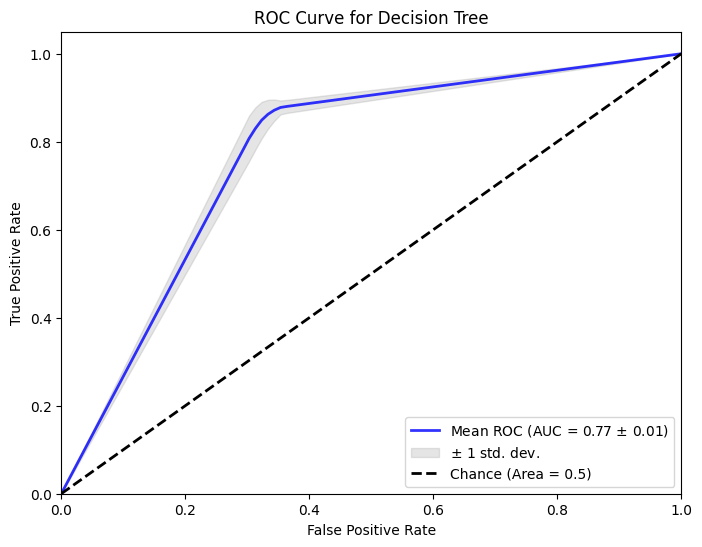

In [103]:
dt = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_idx, test_idx in kf.split(X_scaled_resampled, y_resampled):
    X_train, X_test = X_scaled_resampled[train_idx], X_scaled_resampled[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]    
    dt.fit(X_train, y_train)
    y_prob = dt.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
std_tpr = np.std(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (Area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

Then for XGBoost

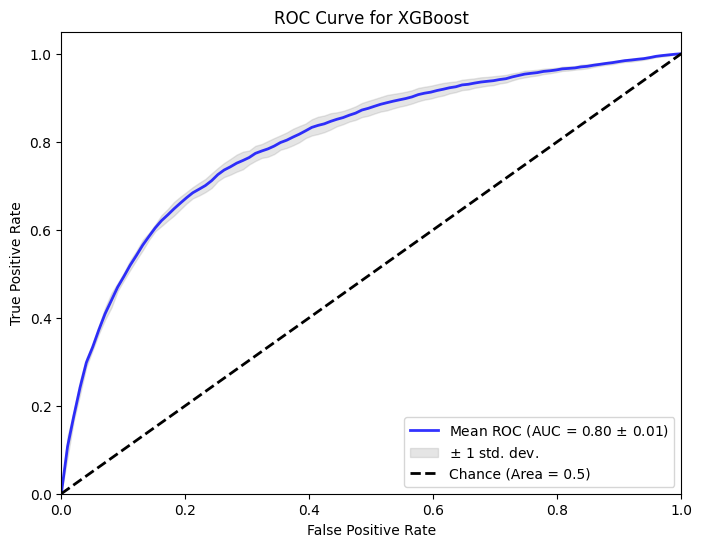

In [104]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

kf = KFold(n_splits=5, shuffle=True, random_state=42)

tprs = [] 
aucs = [] 
mean_fpr = np.linspace(0, 1, 100)

for train_idx, test_idx in kf.split(X_scaled_resampled, y_resampled):
    X_train, X_test = X_scaled_resampled[train_idx], X_scaled_resampled[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]
    
    xgb_model.fit(X_train, y_train)
    
    y_prob = xgb_model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 
std_tpr = np.std(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (Area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

Let's see the distribution of days_between

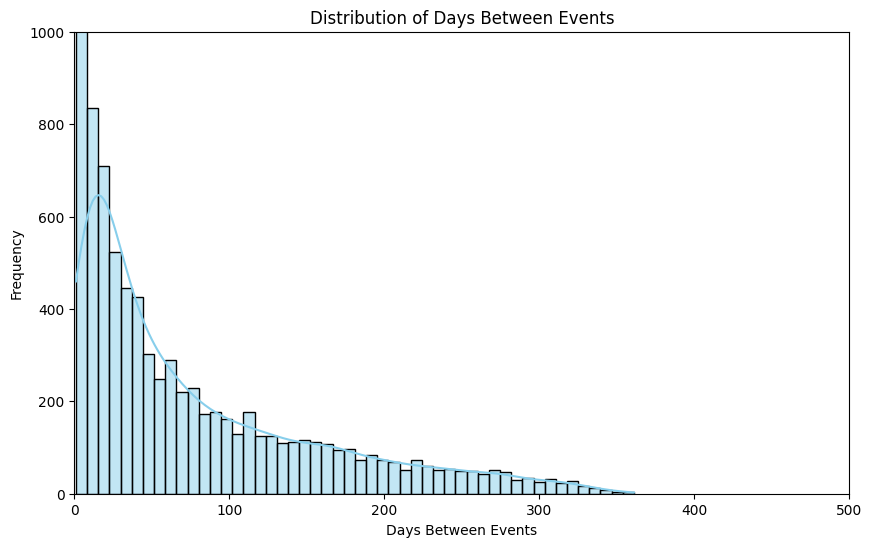

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_non_string['days_between'],kde=True, bins=50,color='skyblue')
plt.autoscale(enable=True, axis='both', tight=True)
plt.title('Distribution of Days Between Events')
plt.xlabel('Days Between Events')
plt.ylabel('Frequency')
plt.xlim([0, 500])
plt.ylim([0, 1000])
plt.show()

We notice that days_between is mainly distributed less than 100, and became relatively rare above 100, then we see the distribution of age vs days_between

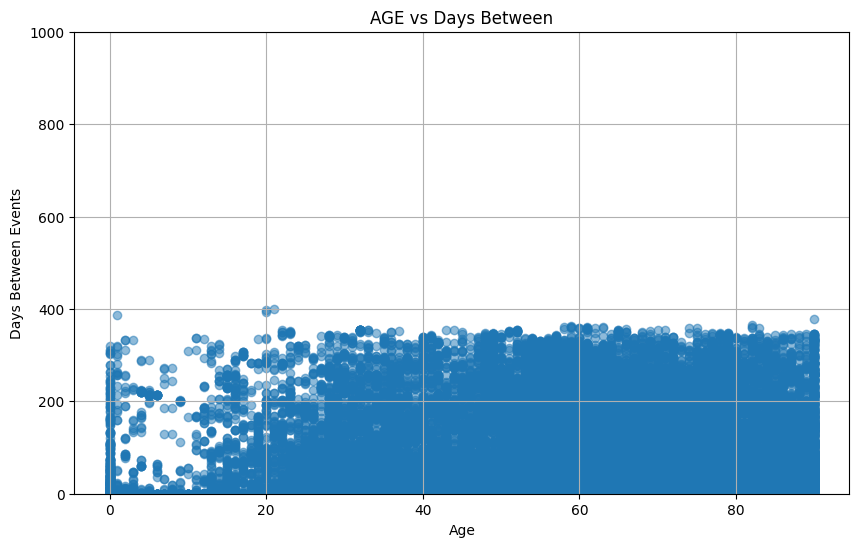

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AGE'], df['days_between'], alpha=0.5)
plt.title('AGE vs Days Between')
plt.xlabel('Age')
plt.ylabel('Days Between Events')
plt.ylim([0, 1000])
plt.grid(True)
plt.show()

We notice that although there seems to be no trend of these two variables, but with age smaller than around 20, the days_between seems to be very sparse. Moreover, I also plot the relationship with other variables that I initially think might affect the days_between

for totalcharges

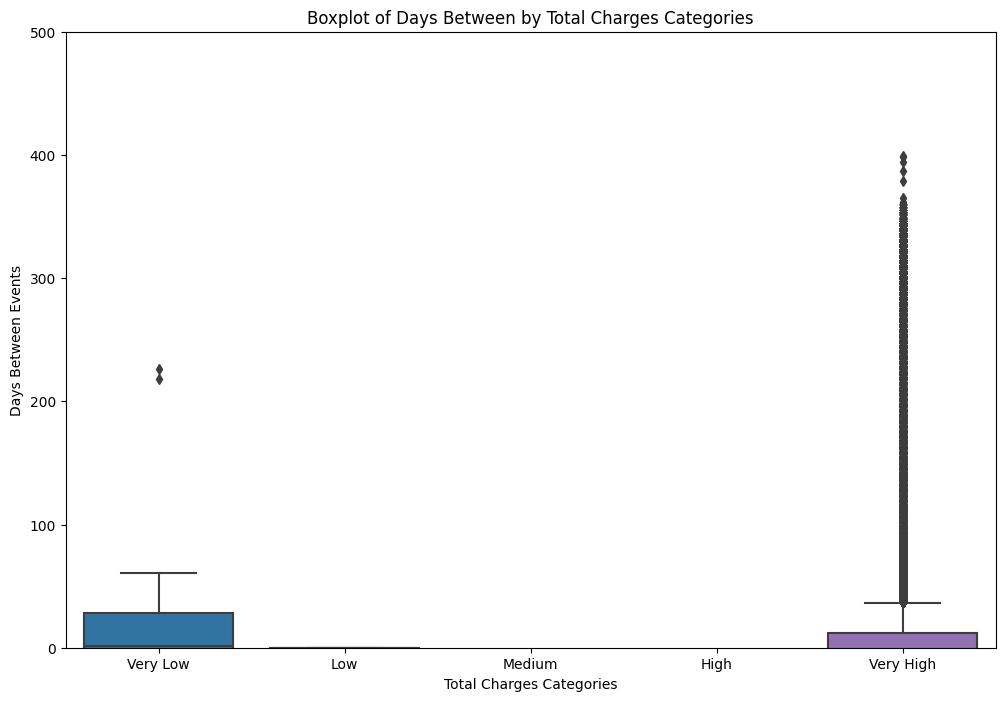

In [7]:
df['TOTCHG_bins'] = pd.cut(df['TOTCHG'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='TOTCHG_bins', y='days_between', data=df)
plt.title('Boxplot of Days Between by Total Charges Categories')
plt.xlabel('Total Charges Categories')
plt.ylabel('Days Between Events')
plt.ylim([0, 500])
plt.show()

We notice there is large amount of days_between and mainly focus on 0 of total charge, there might indicate some relationship

For resident or not

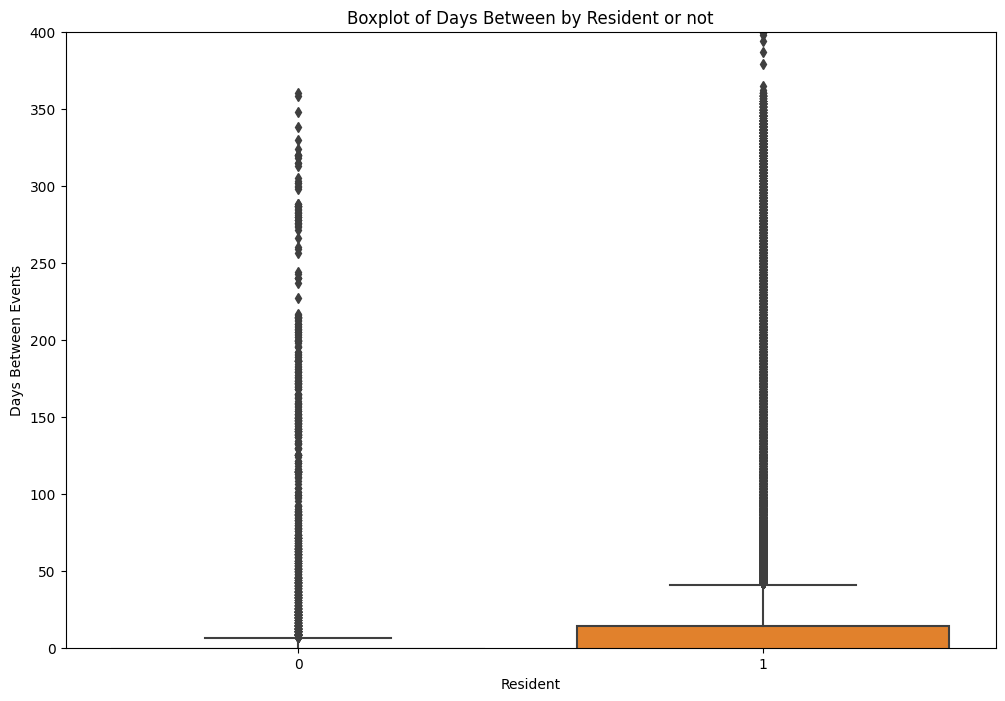

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='RESIDENT', y='days_between', data=df)
plt.title('Boxplot of Days Between by Resident or not')
plt.xlabel('Resident')
plt.ylabel('Days Between Events')
plt.ylim([0, 400])
plt.show()

We notice that the who are resident have a relatively higher days_between than none resident, there might be some relationship

The next is weightdischarged

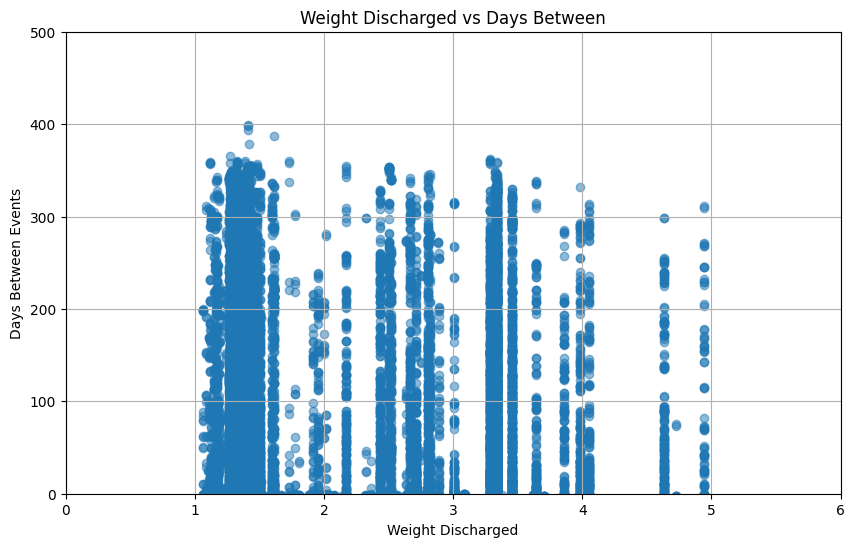

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DISCWT'], df['days_between'], alpha=0.5)
plt.title('Weight Discharged vs Days Between')
plt.xlabel('Weight Discharged')
plt.ylabel('Days Between Events')
plt.ylim([0, 500])
plt.xlim([0, 6])
plt.grid(True)
plt.show()

This doesn't seem to indicate a relationship.

Then for DRG in effect on the discharge day

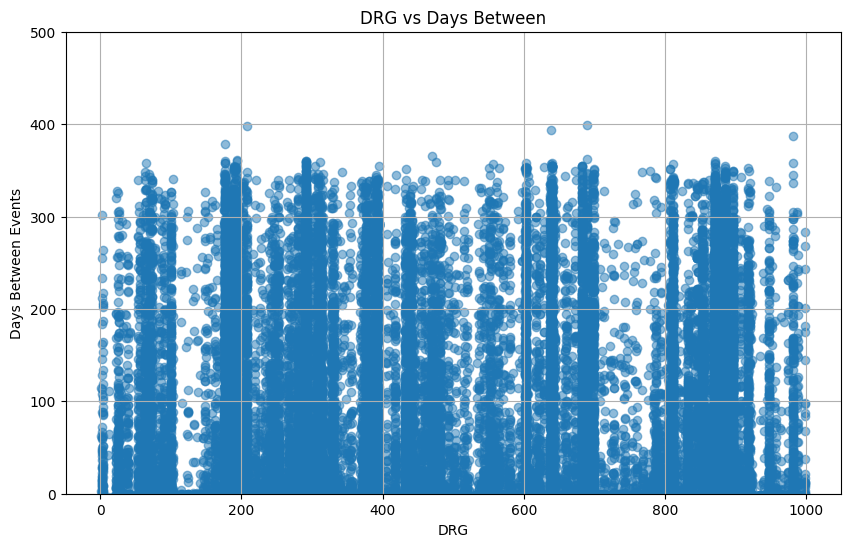

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DRG'], df['days_between'], alpha=0.5)
plt.title('DRG vs Days Between')
plt.xlabel('DRG')
plt.ylabel('Days Between Events')
plt.ylim([0, 500])
plt.grid(True)
plt.show()

There seems not be a relationship.

Then for the dispostion of patient

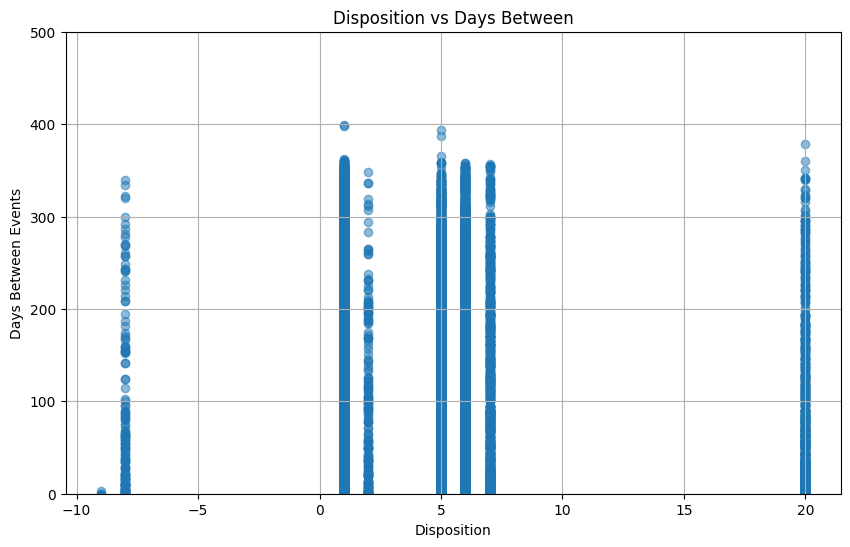

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DISPUNIFORM'], df['days_between'], alpha=0.5)
plt.title('Disposition vs Days Between')
plt.xlabel('Disposition')
plt.ylabel('Days Between Events')
plt.ylim([0, 500])
plt.grid(True)
plt.show()

There seems still not an relationship between these two. To prove my eda, I want to fit a linear regression to all those variables.

I include the below factors that I think might have an effect on days_between: Age, weightdiscarged, resident or not, total charges, disposition of patient,DRG in effect on the discharge day

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.get_dummies(df, columns=['DRG', 'DISPUNIFORM'], drop_first=True)
X = df[['AGE', 'RESIDENT', 'TOTCHG', 'DISCWT'] + [col for col in df.columns if 'DRG' in col or 'DISPUNIFORM' in col]]
y = df['days_between']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7249.5012379139525
R^2 Score: 0.06039699369657758


These result doesn't mean a good fit of the model, which do suggest that these variables may not be good predictors. so I will keep on doing that in the following time

Questions that come up:
1. how to select the variables that might be a predictor to the outcome.
2. I need to keep computing the rate for getting back to hospital using some calculation and figure out the method
3. I assumed that age and weight should have affect on the day of two admission, but why the eda and model doesn't support this? is it because there might be some indirect effect?
4. After finding more potential variables and calculating the rate as the outcome, I also need to apply more techniques to the model to make it can best predict the outcome.

In [35]:
unique_values = merged_df.apply(lambda col: col.unique())

# Print unique values in each column
for column_name, values in unique_values.items():
    print("Column:", column_name)
    print("Unique values:", values)

Column: AGE
Unique values: [57 78 64 41 49 77 63 66 65 60 53 61 58 72 55 24 26 43 51 84 69 82 71 48
 90 67 56 33 86 21 40 88 80 59 73 50 85 46 25 45 39 32 36 54 34 79 20 37
 31 81 74 89 62 35 29 83 23 42 28 30 47 27 70 68 44 52 75 76 87 38 19 22
 18  1  0  3 11  2 17 12 13 14 15 16  7  5  8  4  9 10]
Column: AWEEKEND
Unique values: [0 1]
Column: DIED
Unique values: [ 0  1 -8 -9]
Column: DISCWT
Unique values: [1.2973771 1.3065405 1.3257446 1.362349  1.2717214 1.2610605 1.1470292
 1.1259451 1.111771  1.1452607 1.1538031 1.1943759 1.39836   1.4359327
 1.4215268 1.6134112 1.3911725 1.4108876 1.4138962 2.709199  2.7141459
 1.5977085 1.5029913 1.4176855 1.4625    1.4836321 1.3804057 1.4419643
 1.329694  1.2766689 1.3281219 1.3017334 1.4005213 1.2892664 2.8184629
 2.8928673 2.893631  2.7515853 2.6344458 1.732991  1.7745434 1.5136842
 1.1207082 1.1700529 1.1654926 1.0884107 1.0632868 1.099142  1.3213684
 1.3606994 1.4052488 1.4619967 1.3610176 1.4870868 3.9807165 3.0046167
 3.8585541 3.6434768